<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
N = 1000
X = np.random.random((N, 2))*6 - 3
Y = np.cos(2*X[:,0] + np.cos(3*X[:,1]))

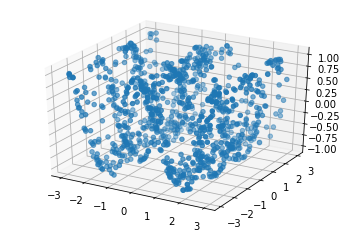

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:, 1], Y)
plt.show()

In [4]:
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
def full_gd(model, criterion, optimizer, X_train, y_train, epochs=1000):
  train_losses = np.zeros(epochs)
  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses[it] = loss.item()
    
    if (it+1) % 50 == 0:
      print(f"Epoch {it+1}/{epochs}, Train Loss : {loss.item():.4f}")
    
  return train_losses

In [7]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1, 1))

In [12]:
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss : 0.2537
Epoch 100/1000, Train Loss : 0.1774
Epoch 150/1000, Train Loss : 0.1443
Epoch 200/1000, Train Loss : 0.1178
Epoch 250/1000, Train Loss : 0.0994
Epoch 300/1000, Train Loss : 0.0848
Epoch 350/1000, Train Loss : 0.0727
Epoch 400/1000, Train Loss : 0.0639
Epoch 450/1000, Train Loss : 0.0583
Epoch 500/1000, Train Loss : 0.0541
Epoch 550/1000, Train Loss : 0.0526
Epoch 600/1000, Train Loss : 0.0573
Epoch 650/1000, Train Loss : 0.0481
Epoch 700/1000, Train Loss : 0.0470
Epoch 750/1000, Train Loss : 0.0477
Epoch 800/1000, Train Loss : 0.0448
Epoch 850/1000, Train Loss : 0.0516
Epoch 900/1000, Train Loss : 0.0433
Epoch 950/1000, Train Loss : 0.0436
Epoch 1000/1000, Train Loss : 0.0421


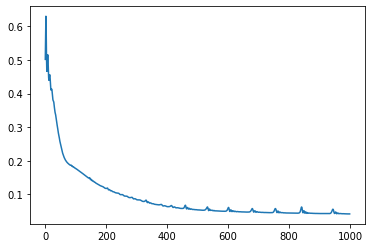

In [13]:
plt.plot(train_losses)

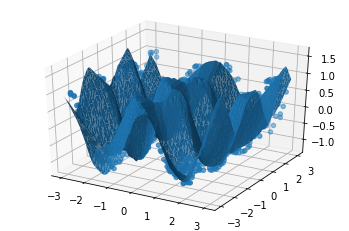

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()